In [5]:
import numpy as np
import scipy.misc
import imageio
import scipy.io as sio
import matplotlib.pyplot as plt
#import tensorflow as tf

loss = np.load('output/jiaoti_loss.npy',allow_pickle=True)
print(len(loss))###396
cur_index = 0
res_loss = []
z = []

#tps_loss_ = np.load('output/TPS200loss.npy',allow_pickle=True)
tps_loss_ = np.load('output/TPS200loss400.npy',allow_pickle=True)
#tps_loss_ = np.mat(tps_loss_)
print(tps_loss_.shape)##N 2 M   2 2 151
tps_loss_ = tps_loss_.transpose((0,2,1))
#tps_loss = np.array(tps_loss)
tps_loss = []
for i in range(len(tps_loss_)):
    tps_loss.append(tps_loss_[i])
tps_loss.sort(key = lambda x:len(x))
#print(tps_loss)
n_max = len(tps_loss[-1])
for i in range(len(tps_loss)):
    if len(tps_loss[i])<n_max:
        for j in range(n_max - len(tps_loss[i])):
            tps_loss[i].append(tps_loss[i][-1])
    tps_loss[i] = np.array(tps_loss[i])
tps_loss = np.array(tps_loss)

tps_loss_mean = []
for i in range(n_max):
    c = 0
    d = 0
    for j in range(len(tps_loss)):
        c += tps_loss[j][i][0]
        d += tps_loss[j][i][1]
    tps_loss_mean.append(c/d)
    

#tps_loss = np.mean(tps_loss,axis = 0)
print(11111111111)
print(tps_loss_mean)
for i in range(len(tps_loss_mean)-1):################
    res_loss.append(tps_loss_mean[i])
    z.append(-2)

res_loss_2 = res_loss  
res_loss = res_loss[0:100]
z = z[0:100]
res_loss.append(tps_loss_mean[-1])
z.append(0)

for total_step in range(2):
    for i in range(cur_index,len(loss)):
        if loss[i] == [1,1]:break
        print(loss[i])
        res_loss.append(loss[i][0])
        z.append(0)
    index = i
    cur_index = index
    n = 10
    z_loss = []
    for i in range(index+1,index + n+1):
        z_loss.append(loss[i])
        #print(loss[i])
    z_loss.sort(key = lambda x:len(x))
    #print(z_loss)
    max_n = len(z_loss[-1])
    for i in range(len(z_loss)-1):
        if len(z_loss[i])<max_n:
            for j in range(max_n-len(z_loss[i])):
                z_loss[i].append(z_loss[i][-1])
    z_loss = np.array(z_loss)
    
    print(z_loss.shape)
    print(max_n)
    #z_loss = np.mean(z_loss, axis = 0)
    #print(z_loss)
    #for i in range(len(z_loss)):
    #    res_loss.append(z_loss[i])
    #    z.append(1)
    z_loss_mean = []
    for i in range(max_n):
        c = 0
        d = 0
        for j in range(len(z_loss)):
            c += z_loss[j][i][0]
            d += z_loss[j][i][1]
        z_loss_mean.append(c/d)
    
    #z_loss = np.mean(z_loss, axis = 0)
    print(z_loss_mean)
    for i in range(len(z_loss_mean)):
        res_loss.append(z_loss_mean[i])
        z.append(1)
    z[-1] = 0
    #res_loss.extend(z_loss)
    cur_index += 11
    #print(loss[cur_index],'1111111111111111111111111')
    



print(res_loss)
x = [i for i in range(len(res_loss))]
print(x)
print(z)
print(len(res_loss),len(x),len(z))

224
(2, 2, 401)
11111111111
[154.45685162165807, 141.95554272666033, 131.59617667772363, 122.2341831311029, 114.29249276987152, 107.82344612406811, 102.60371978299891, 98.21515129216421, 94.55667078467073, 91.50082815049096, 88.87693594104606, 86.50841365434763, 84.40076444295208, 82.48354289533984, 80.65499395574432, 78.91028220454311, 77.3513388867442, 75.92901292102859, 74.61148227167206, 73.44736494587774, 72.39511989133769, 71.47681596644777, 70.66976105480887, 69.98159797237412, 69.41374899541472, 68.87724365741997, 68.4491272551748, 68.09190101692943, 67.77863419280699, 67.50166639443283, 67.25677687088404, 67.04544903308005, 66.87687737295812, 66.70275071783509, 66.55225246593217, 66.37948271881078, 66.22899714481929, 66.08312904085967, 65.96974202999758, 65.82937531098747, 65.69459034508655, 65.58121584686916, 65.48854538572388, 65.40196332811557, 65.30927103352363, 65.23827136359729, 65.18763620360338, 65.140040600016, 65.09082849027321, 65.06275106588014, 65.02589433924469, 

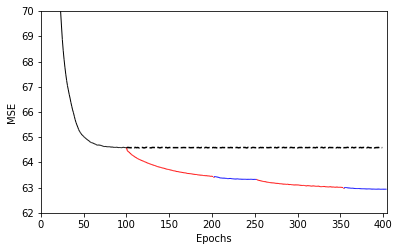

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.array(x)
y = np.array(res_loss)
z = np.array(z)  # first derivative

# Create a colormap for red, green and blue and a norm to color
# f' < -0.5 red, f' > 0.5 blue, and the rest green
cmap = ListedColormap(['black', 'r', 'b'])
norm = BoundaryNorm([-3, -1, 0.5, 2], cmap.N)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(z)
lc.set_linewidth(1)

fig1 = plt.figure(facecolor='w')
plt.gca().add_collection(lc)


xx = [i for i in range(100,400)]
plt.plot(xx, res_loss_2[100:], color = 'black', linestyle = 'dashed')


plt.xlim(min(x), max(x))
plt.ylim(62, 70)

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.15)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.savefig('./out/jiaotiloss.tif', dpi = 600)

[64.1354603  61.49429168 60.14417725 59.50987509 59.15125358 58.94108364
 58.80600729 58.67341366 58.56190626 58.47684736 58.41254255 58.3499975
 58.3011006  58.25929275 58.21220328 58.17746446 58.12156123 58.06171011
 58.01531325 57.98593726 57.96056292 57.93732471 57.92805173 57.91414924
 57.90274267 57.89422825 57.88278673 57.87258389 57.86127864 57.84440545
 57.8304787  57.81746018 57.80590948 57.80668585 57.79699488 57.78925281
 57.78437372 57.77924766 57.77614364 57.77255332 57.76859238 57.76665336
 57.75906607 57.7592114  57.75519797 57.75281159 57.74587079 57.745798
 57.74708358 57.7459286  57.74304632 57.73484328 57.73259988 57.73601212
 57.7378348  57.73680459 57.73173376 57.73567356 57.73218196 57.73126946
 57.7268662  57.72905341 57.7330858  57.73533235 57.73062846 57.72972306
 57.73058182 57.73179352 57.72925267 57.723454   57.72334804 57.7236127
 57.72944361 57.72679123 57.72441164 57.72534595 57.7267189  57.72786663
 57.72841924 57.72604191 57.72526448 57.72717036 57.729

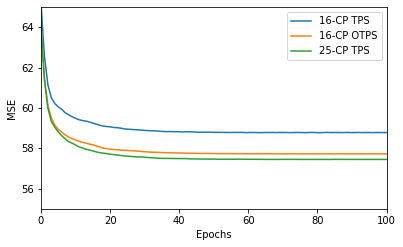

In [15]:
import numpy as np
import scipy.misc
import imageio
import scipy.io as sio
import matplotlib.pyplot as plt
#import tensorflow as tf


tps_loss = np.load('output/TPSloss_per_img.npy',allow_pickle=True)
     
print(tps_loss)
tps_loss0 = np.load('output/TPSloss_per_img_base.npy',allow_pickle=True)
print(tps_loss0)##N 2 M
tps_loss1 = np.load('output/TPSloss_per_img_base55.npy',allow_pickle=True)
print(tps_loss1)##N 2 M

x = [i for i in range(len(tps_loss0))]
fig, ax = plt.subplots() # 创建图实例
ax.plot(x, tps_loss0, label='16-CP TPS') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, tps_loss, label='16-CP OTPS') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, tps_loss1, label='25-CP TPS') #作y2 = x^2 图，并标记此线名为quadratic
ax.set_xlabel('Epochs') #设置x轴名称 x label
ax.set_ylabel('MSE') #设置y轴名称 y label
#ax.set_title('Simple Plot') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.xlim(min(x), max(x))
plt.ylim(55, 65)
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.15)
plt.savefig('./out/expectcmp.tif', dpi = 600, facecolor='w', edgecolor='w',transparent = False)

224
[69.68322060840032, 0]
[66.03948422803289, 0]
[65.01490276508858, 0]
[64.64545871004744, 0]
[64.49040342897362, 0]
[64.42058584712458, 0]
[64.38592423436867, 0]
[64.37116889516126, 0]
[64.35385707851147, 0]
[64.3320562583037, 0]
[64.32430250985372, 0]
[64.30481907335451, 0]
[64.29116844543016, 0]
[64.27861339558667, 0]
[64.26674590203335, 0]
[64.2564161239026, 0]
[64.24415800892146, 0]
[64.23304965788732, 0]
[64.2205766692584, 0]
[64.21357880803538, 0]
[64.19585698901469, 0]
[64.19232499144148, 0]
[64.18161243160478, 0]
[64.16280037150078, 0]
[64.15517487181579, 0]
[64.14524977294354, 0]
[64.13337817721091, 0]
[64.12642582805363, 0]
[64.11549259910734, 0]
[64.10861526215157, 0]
[64.0989901626582, 0]
[64.09110279290475, 0]
[64.08493265663074, 0]
[64.07539257108063, 0]
[64.06249587509124, 0]
[64.0547419644244, 0]
[64.04519082027605, 0]
[64.04363318583879, 0]
[64.0325355111794, 0]
[64.02902627311768, 0]
[64.01801241633997, 0]
[64.01424301727654, 0]
[64.00521389891111, 0]
[64.006229411

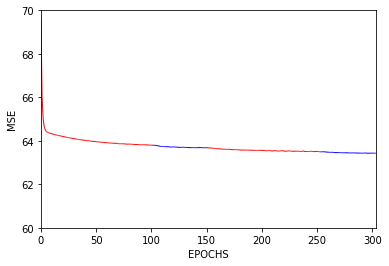

In [1]:
import numpy as np
import scipy.misc
import imageio
import scipy.io as sio
import matplotlib.pyplot as plt
#import tensorflow as tf

loss = np.load('output/jiaoti_total_loss.npy',allow_pickle=True)
print(len(loss))###396
cur_index = 0
res_loss = []
z = []


for total_step in range(2):
    for i in range(cur_index,len(loss)):
        if loss[i] == [1,1]:break
        print(loss[i])
        res_loss.append(loss[i][0])
        z.append(0)
    index = i
    cur_index = index
    n = 10
    z_loss = []
    for i in range(index+1,index + n+1):
        z_loss.append(loss[i])
        #print(loss[i])
    z_loss.sort(key = lambda x:len(x))
    #print(z_loss)
    max_n = len(z_loss[-1])
    for i in range(len(z_loss)-1):
        if len(z_loss[i])<max_n:
            for j in range(max_n-len(z_loss[i])):
                z_loss[i].append(z_loss[i][-1])
    z_loss = np.array(z_loss)
    
    print(z_loss.shape)
    print(max_n)
    #z_loss = np.mean(z_loss, axis = 0)
    #print(z_loss)
    #for i in range(len(z_loss)):
    #    res_loss.append(z_loss[i])
    #    z.append(1)
    z_loss_mean = []
    for i in range(max_n):
        c = 0
        d = 0
        for j in range(len(z_loss)):
            c += z_loss[j][i][0]
            d += z_loss[j][i][1]
        z_loss_mean.append(c/d + z_loss[0][i][2])
    
    #z_loss = np.mean(z_loss, axis = 0)
    print(z_loss_mean)
    for i in range(len(z_loss_mean)):
        res_loss.append(z_loss_mean[i])
        z.append(1)
    z[-1] = 0
    #res_loss.extend(z_loss)
    cur_index += 11
    #print(loss[cur_index],'1111111111111111111111111')
    



print(res_loss)
x = [i for i in range(len(res_loss))]
print(x)
print(z)
print(len(res_loss),len(x),len(z))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.array(x)
y = np.array(res_loss)
z = np.array(z)  # first derivative

# Create a colormap for red, green and blue and a norm to color
# f' < -0.5 red, f' > 0.5 blue, and the rest green
cmap = ListedColormap(['r', 'b'])
norm = BoundaryNorm([-1, 0.5, 2], cmap.N)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(z)
lc.set_linewidth(1)

fig1 = plt.figure()
plt.gca().add_collection(lc)
plt.xlim(min(x), max(x))
plt.ylim(60, 70)

plt.xlabel('EPOCHS')
plt.ylabel('MSE')
plt.savefig('./out/jiaotitotalloss.png', dpi = 200, bbox_inches = 'tight',pad_inches = 0)


In [ ]:
硅胶画图

In [7]:
import numpy as np
import scipy.misc
import imageio
import scipy.io as sio
import matplotlib.pyplot as plt
#import tensorflow as tf

loss = np.load('output/guijiao/jiaoti_loss.npy',allow_pickle=True)
print(len(loss))###396
cur_index = 0
res_loss = []
z = []

tps_loss_ = np.load('output/guijiao/TPS200loss400.npy',allow_pickle=True)
print(tps_loss_.shape)##N 2 M   2 2 151
tps_loss_ = tps_loss_.transpose((0,2,1))
#tps_loss = np.array(tps_loss)
tps_loss = []
for i in range(len(tps_loss_)):
    tps_loss.append(tps_loss_[i])
tps_loss.sort(key = lambda x:len(x))
#print(tps_loss)
n_max = len(tps_loss[-1])
for i in range(len(tps_loss)):
    if len(tps_loss[i])<n_max:
        for j in range(n_max - len(tps_loss[i])):
            tps_loss[i].append(tps_loss[i][-1])
    tps_loss[i] = np.array(tps_loss[i])
tps_loss = np.array(tps_loss)

tps_loss_mean = []
for i in range(n_max):
    c = 0
    d = 0
    for j in range(len(tps_loss)):
        c += tps_loss[j][i][0]
        d += tps_loss[j][i][1]
    tps_loss_mean.append(c/d)
    

#tps_loss = np.mean(tps_loss,axis = 0)
print(11111111111)
print(tps_loss_mean)
for i in range(len(tps_loss_mean)-1):################
    res_loss.append(tps_loss_mean[i])
    z.append(-2)

res_loss_2 = res_loss     
res_loss = res_loss[0:100]
z = z[0:100]
res_loss.append(tps_loss_mean[-1])
z.append(0)
#res_loss.append(tps_loss_mean[-1]-0.13)
#z.append(0)
for total_step in range(2):
    for i in range(cur_index,len(loss)):
        if loss[i] == [1,1]:break
        print(loss[i])
        res_loss.append(loss[i][0])
        z.append(0)
    index = i
    cur_index = index
    n = 10
    z_loss = []
    for i in range(index+1,index + n+1):
        z_loss.append(loss[i])
        #print(loss[i])
    z_loss.sort(key = lambda x:len(x))
    #print(z_loss)
    max_n = len(z_loss[-1])
    for i in range(len(z_loss)-1):
        if len(z_loss[i])<max_n:
            for j in range(max_n-len(z_loss[i])):
                z_loss[i].append(z_loss[i][-1])
    z_loss = np.array(z_loss)
    
    print(z_loss.shape)
    print(max_n)
    #z_loss = np.mean(z_loss, axis = 0)
    #print(z_loss)
    #for i in range(len(z_loss)):
    #    res_loss.append(z_loss[i])
    #    z.append(1)
    z_loss_mean = []
    for i in range(max_n):
        c = 0
        d = 0
        for j in range(len(z_loss)):
            c += z_loss[j][i][0]
            d += z_loss[j][i][1]
        z_loss_mean.append(c/d)
    
    #z_loss = np.mean(z_loss, axis = 0)
    print(z_loss_mean)
    for i in range(len(z_loss_mean)):
        res_loss.append(z_loss_mean[i])
        z.append(1)
    z[-1] = 0
    #res_loss.extend(z_loss)
    cur_index += 11
    #print(loss[cur_index],'1111111111111111111111111')
    
#for i in range(50):
#    res_loss.pop()
#   z.pop()


print(res_loss)
x = [i for i in range(len(res_loss))]
print(x)
print(z)
print(len(res_loss),len(x),len(z))

336
(2, 2, 601)
11111111111
[133.97992916666666, 130.457975, 127.48695416666666, 124.62275833333334, 121.44620833333333, 117.832175, 114.56540833333334, 111.44373333333333, 108.53084583333333, 105.83234583333333, 103.384475, 101.124225, 99.02134583333333, 97.04320833333334, 95.06838333333333, 93.08025833333333, 91.21559166666667, 89.52889166666667, 88.02025, 86.67502916666666, 85.45119583333333, 84.29895416666666, 83.1811625, 82.14386666666667, 81.15640416666666, 80.1920625, 79.28215, 78.43147083333334, 77.63596666666666, 76.8883625, 76.17048333333334, 75.46399583333333, 74.78806666666667, 74.13357916666666, 73.48963333333333, 72.88797083333333, 72.33286666666666, 71.8241125, 71.36275, 70.94817083333334, 70.577325, 70.24397708333333, 69.93692708333333, 69.63768125, 69.35961041666667, 69.11079166666667, 68.89136041666667, 68.699775, 68.53410416666667, 68.39199583333334, 68.27055208333333, 68.16692291666666, 68.07849791666666, 68.00226666666667, 67.93505625, 67.87358541666667, 67.8186979

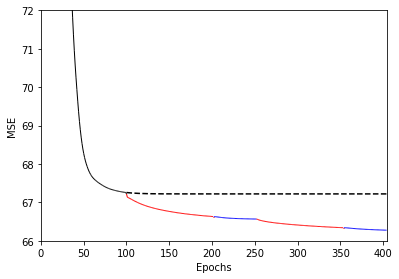

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.array(x)
y = np.array(res_loss)
z = np.array(z)  # first derivative

# Create a colormap for red, green and blue and a norm to color
# f' < -0.5 red, f' > 0.5 blue, and the rest green
cmap = ListedColormap(['black','r', 'b'])
norm = BoundaryNorm([-3, -1, 0.5, 2], cmap.N)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(z)
lc.set_linewidth(1)

fig1 = plt.figure(facecolor='w')
plt.gca().add_collection(lc)

xx = [i for i in range(100,600)]
plt.plot(xx, res_loss_2[100:], color = 'black', linestyle = 'dashed')


plt.xlim(min(x), max(x))
plt.ylim(66, 72)

plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('./out/jiaotiloss_phantom.tif', dpi = 600)

[74.43693121 72.03828675 70.31539546 69.29986867 68.66481525 68.18009263
 67.83255408 67.60886138 67.45888875 67.33482921 67.22120754 67.11421208
 67.01654692 66.92244921 66.82427308 66.73186788 66.66200596 66.61400517
 66.57560242 66.53657767 66.49723217 66.46255163 66.43485958 66.41402967
 66.39735575 66.38180125 66.36552367 66.35040708 66.33631062 66.3241945
 66.31316963 66.30219325 66.28964779 66.27592562 66.26277792 66.25153954
 66.24231625 66.23532033 66.23061517 66.22772917 66.22571317 66.22407562
 66.22283137 66.22170637 66.21979654 66.21655233 66.21217854 66.20792246
 66.20434438 66.20125588 66.19877388 66.19668283 66.19447404 66.19253787
 66.19094137 66.18958487 66.18850575 66.18776838 66.18719388 66.18671175
 66.18630712 66.18600671 66.18556567 66.18492596 66.18434975 66.18383863
 66.18326042 66.18286275 66.18246121 66.18213933 66.18188642 66.18168304
 66.18154154 66.18144429 66.18135288 66.18115846 66.1810455  66.18089108
 66.18079463 66.18065504 66.18048933 66.18035754 66.

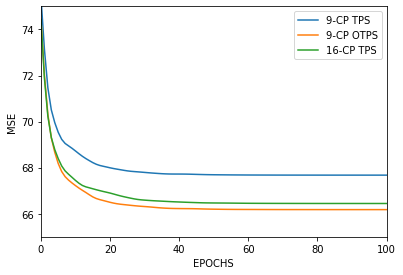

In [14]:
import numpy as np
import scipy.misc
import imageio
import scipy.io as sio
import matplotlib.pyplot as plt
#import tensorflow as tf


tps_loss = np.load('output/guijiao/TPSloss_per_img.npy',allow_pickle=True)
     
print(tps_loss)
tps_loss0 = np.load('output/guijiao/TPSloss_per_img_base.npy',allow_pickle=True)
print(tps_loss0)##N 2 M
tps_loss1 = np.load('output/guijiao/TPSloss_per_img_base44.npy',allow_pickle=True)
print(tps_loss1)##N 2 M

x = [i for i in range(len(tps_loss0))]
fig, ax = plt.subplots() # 创建图实例
ax.plot(x, tps_loss0, label='9-CP TPS') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, tps_loss, label='9-CP OTPS') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, tps_loss1, label='16-CP TPS') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('EPOCHS') #设置x轴名称 x label
ax.set_ylabel('MSE') #设置y轴名称 y label
#ax.set_title('Simple Plot') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.xlim(min(x), max(x))
plt.ylim(65, 75)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('./out/expectcmp_phantom.tif', dpi = 600, facecolor='w', edgecolor='w',transparent = False)

336
[78.41980902520568, 0]
[70.5729352406837, 0]
[68.3375817744355, 0]
[67.59284262336243, 0]
[67.29524905191403, 0]
[67.17807663751513, 0]
[67.12904187324719, 0]
[67.10537115437045, 0]
[67.09093786578113, 0]
[67.08080682707306, 0]
[67.07208040339329, 0]
[67.06422795339653, 0]
[67.05686993463567, 0]
[67.04978987112251, 0]
[67.0432857615285, 0]
[67.03679481857459, 0]
[67.03106410078071, 0]
[67.02586014140971, 0]
[67.02079630896637, 0]
[67.01565646019692, 0]
[67.01091977678577, 0]
[67.00684855725683, 0]
[67.00301836107542, 0]
[66.99900895133953, 0]
[66.99535122092455, 0]
[66.99146539497153, 0]
[66.98851776886478, 0]
[66.98555991834466, 0]
[66.98271501992171, 0]
[66.9802550933529, 0]
[66.9782489127332, 0]
[66.97551953429013, 0]
[66.9718703555577, 0]
[66.96980855011822, 0]
[66.9693431572949, 0]
[66.96850323863055, 0]
[66.96612678515872, 0]
[66.96417458505546, 0]
[66.96313502893567, 0]
[66.96035576790572, 0]
[66.95827117272943, 0]
[66.95889511962643, 0]
[66.95859566930184, 0]
[66.9599519246

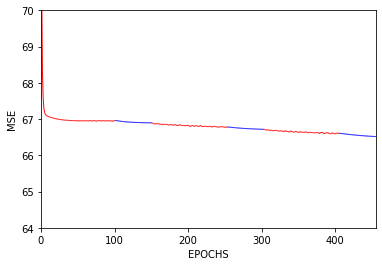

In [14]:
import numpy as np
import scipy.misc
import imageio
import scipy.io as sio
import matplotlib.pyplot as plt
#import tensorflow as tf

loss = np.load('output/guijiao/jiaoti_total_loss.npy',allow_pickle=True)
print(len(loss))###396
cur_index = 0
res_loss = []
z = []


for total_step in range(3):
    for i in range(cur_index,len(loss)):
        if loss[i] == [1,1]:break
        print(loss[i])
        res_loss.append(loss[i][0])
        z.append(0)
    index = i
    cur_index = index
    n = 10
    z_loss = []
    for i in range(index+1,index + n+1):
        z_loss.append(loss[i])
        #print(loss[i])
    z_loss.sort(key = lambda x:len(x))
    #print(z_loss)
    max_n = len(z_loss[-1])
    for i in range(len(z_loss)-1):
        if len(z_loss[i])<max_n:
            for j in range(max_n-len(z_loss[i])):
                z_loss[i].append(z_loss[i][-1])
    z_loss = np.array(z_loss)
    
    print(z_loss.shape)
    print(max_n)
    #z_loss = np.mean(z_loss, axis = 0)
    #print(z_loss)
    #for i in range(len(z_loss)):
    #    res_loss.append(z_loss[i])
    #    z.append(1)
    z_loss_mean = []
    for i in range(max_n):
        c = 0
        d = 0
        for j in range(len(z_loss)):
            c += z_loss[j][i][0]
            d += z_loss[j][i][1]
        z_loss_mean.append(c/d + z_loss[0][i][2])
    
    #z_loss = np.mean(z_loss, axis = 0)
    print(z_loss_mean)
    for i in range(len(z_loss_mean)):
        res_loss.append(z_loss_mean[i])
        z.append(1)
    z[-1] = 0
    #res_loss.extend(z_loss)
    cur_index += 11
    #print(loss[cur_index],'1111111111111111111111111')
    


    
    

print(res_loss)
x = [i for i in range(len(res_loss))]
print(x)
print(z)
print(len(res_loss),len(x),len(z))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.array(x)
y = np.array(res_loss)
z = np.array(z)  # first derivative

# Create a colormap for red, green and blue and a norm to color
# f' < -0.5 red, f' > 0.5 blue, and the rest green
cmap = ListedColormap(['r', 'b'])
norm = BoundaryNorm([-1, 0.5, 2], cmap.N)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(z)
lc.set_linewidth(1)

fig1 = plt.figure()
plt.gca().add_collection(lc)
plt.xlim(min(x), max(x))
plt.ylim(64, 70)

plt.xlabel('EPOCHS')
plt.ylabel('MSE')
plt.savefig('./out/jiaotitotalloss.png', dpi = 200, bbox_inches = 'tight',pad_inches = 0)
